In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer

In [3]:
file_path = 'GSE103334_FPKM_CKP25_TOPHAT.txt'
df = pd.DataFrame()
df = pd.read_csv(file_path, sep='\t', header=0, index_col=0) #diavazw ta data

data = df.transpose()##antistrefw ton pinaka

labels = pd.DataFrame()
file_path2 = 'labels1.csv'
labels = pd.read_csv(file_path2, sep='\;')#diavazw ta labels

data['Labels'] = labels.values #bazw ta labes mazi me ta data
data

C:\Users\Katerina\AppData\Local\Temp\ipykernel_6184\3836212855.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  labels = pd.read_csv(file_path2, sep='\;')#diavazw ta labels


GENES,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,Labels
CK_0w_m3_A1,0.379103,11.7277,22.0407,4.05648,10.9324,0.082063,5.23899,55.5093,8.48037,11.0711,...,1.71918,1.10084,1.44597,1.99025,0.0,4.167730,7.22038,4.69690,2.42857,3
CK_0w_m3_A10,0.000000,0.0000,0.0000,0.00000,0.0000,0.000000,0.00000,0.0000,0.00000,0.0000,...,0.00000,0.00000,0.00000,0.00000,0.0,0.000000,0.00000,0.00000,0.00000,3
CK_0w_m3_A11,0.000000,0.0000,0.0000,0.00000,0.0000,0.000000,0.00000,73.3392,0.00000,0.0000,...,0.00000,4.44716,0.00000,0.00000,0.0,0.000000,0.00000,0.00000,12.34380,3
CK_0w_m3_A12,0.000000,0.0000,0.0000,0.00000,0.0000,0.000000,42.88510,0.0000,0.00000,0.0000,...,0.00000,0.00000,0.00000,0.00000,0.0,0.000000,0.00000,0.00000,0.00000,3
CK_0w_m3_A2,0.000000,0.0000,0.0000,0.00000,0.0000,0.000000,0.00000,0.0000,0.00000,0.0000,...,0.00000,0.00000,0.00000,0.00000,0.0,0.000000,0.00000,0.00000,0.00000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CKp25_6w_m4_H5,0.000000,0.0000,0.0000,0.00000,0.0000,0.000000,0.00000,0.0000,0.00000,38.4711,...,0.00000,0.00000,0.00000,0.00000,0.0,0.000000,0.00000,0.00000,0.00000,3
CKp25_6w_m4_H6,0.000000,165.9880,0.0000,0.00000,0.0000,0.000000,0.00000,0.0000,0.00000,0.0000,...,0.00000,0.00000,0.00000,0.00000,0.0,0.000000,0.00000,0.00000,0.00000,3
CKp25_6w_m4_H7,0.000000,60.4405,0.0000,0.00000,0.0000,0.000000,0.00000,0.0000,0.00000,0.0000,...,11.53550,4.12698,0.00000,0.00000,0.0,0.000000,13.47330,0.00000,0.00000,3
CKp25_6w_m4_H8,0.000000,172.7880,0.0000,0.00000,0.0000,0.000000,0.00000,48.0640,0.00000,0.0000,...,0.00000,2.93803,0.00000,0.00000,0.0,0.952862,8.82120,4.54714,0.00000,3


In [4]:
labels.value_counts()

labels
1         576
2         576
3         576
4         480
dtype: int64

In [5]:
labels.value_counts(normalize = True)*100

labels
1         26.086957
2         26.086957
3         26.086957
4         21.739130
dtype: float64

In [6]:
#eksairw tin prwti stili apo ton diaxwrismo
X = data.iloc[1:, 1:-1].values  # painvw ola ta xarakthristika ektos tis prrwtis kai teleutaias stilis
y = data.iloc[1:, -1].values  # output - labels

In [12]:
#xwrizw se test kai train 80% test-20% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mean_var = np.mean(np.var(X, axis = 0))
mean_var

2575189.628476516

In [14]:
#orizw 3 kontinoterous geitones
n_neighbors = 3 

#xaraktiristika apo 1 mexri 300 kai bima 10
num_features_range = range(1, 300, 10)

#orizw poious algorithmous tha xrisimopoiisw kai tis parametrous tous
algorithms = [
    ('Variance Threshold', VarianceThreshold(threshold=mean_var)), #threshold tyxaia pira 17 den mporousa na to trxw polles fores
    ('SelectKBest', SelectKBest(chi2)), #chi2 kapoia statistiki dokimi
    ('Feature Importance', RandomForestClassifier(n_estimators=100)),#100 descision trees
    ('PCA', PCA())
]

# thetw tis metrikes aksiologisis algoritmwn
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

#lexiko apotelesmatwn pou periexei algorithmous kai tis aksiologiseis tous
results = {metric: {alg_name: [] for alg_name, _ in algorithms} for metric in metrics}

#i diadikasia tha ginei epanaliptika 3 fores
iterations = 3 
for i in range(iterations):
#se kathe epanalipsi thelw tyxaio deigma dedomenwn
    X, y = shuffle(X, y, random_state = i)
    for j in num_features_range:
        for alg_name, algorithm in algorithms:
            # epilogi xaraktiristikwn me tin xrisi twn epilegmenwn algorithmwn
            if alg_name == 'Variance Threshold':
                X_selected = algorithm.fit_transform(X) 
            elif alg_name == 'SelectKBest':
                X_selected = algorithm.fit_transform(X, y)
            elif alg_name == 'Feature Importance':
                algorithm.fit(X, y)
                importance_scores = algorithm.feature_importances_
                sorted_indices = np.argsort(importance_scores)[::-1]
                X_selected = X[:, sorted_indices[:j]]
            elif alg_name == 'PCA':
                X_selected = algorithm.fit_transform(X)

            # aksiologountai ta epilegmeta xaraktiristika me basi ton knn geitones = 3
            knn = KNeighborsClassifier(n_neighbors=n_neighbors)
            knn.fit(X_selected, y) #ta epilegomena xaraktiristika me tin eksodo

            #cross validation ginetai 5 fores sta epilegmena xaraktiristika
            scores = cross_val_score(knn, X_selected, y, cv=5)

            # gia kathe algorithmo ypologizontai oi metrikes
            accuracy = accuracy_score (y, knn.predict(X_selected))
            precision = precision_score(y, knn.predict(X_selected), average='weighted')
            recall = recall_score(y, knn.predict(X_selected), average='weighted')
            f1 = f1_score(y, knn.predict(X_selected), average='weighted')

            # apothikeusi kathe metrikwn kathe algorithmoy kathe epanalipsis
            results['Accuracy'][alg_name].append(accuracy)
            results['Precision'][alg_name].append(precision)
            results['Recall'][alg_name].append(recall)
            results['F1-score'][alg_name].append(f1)
            


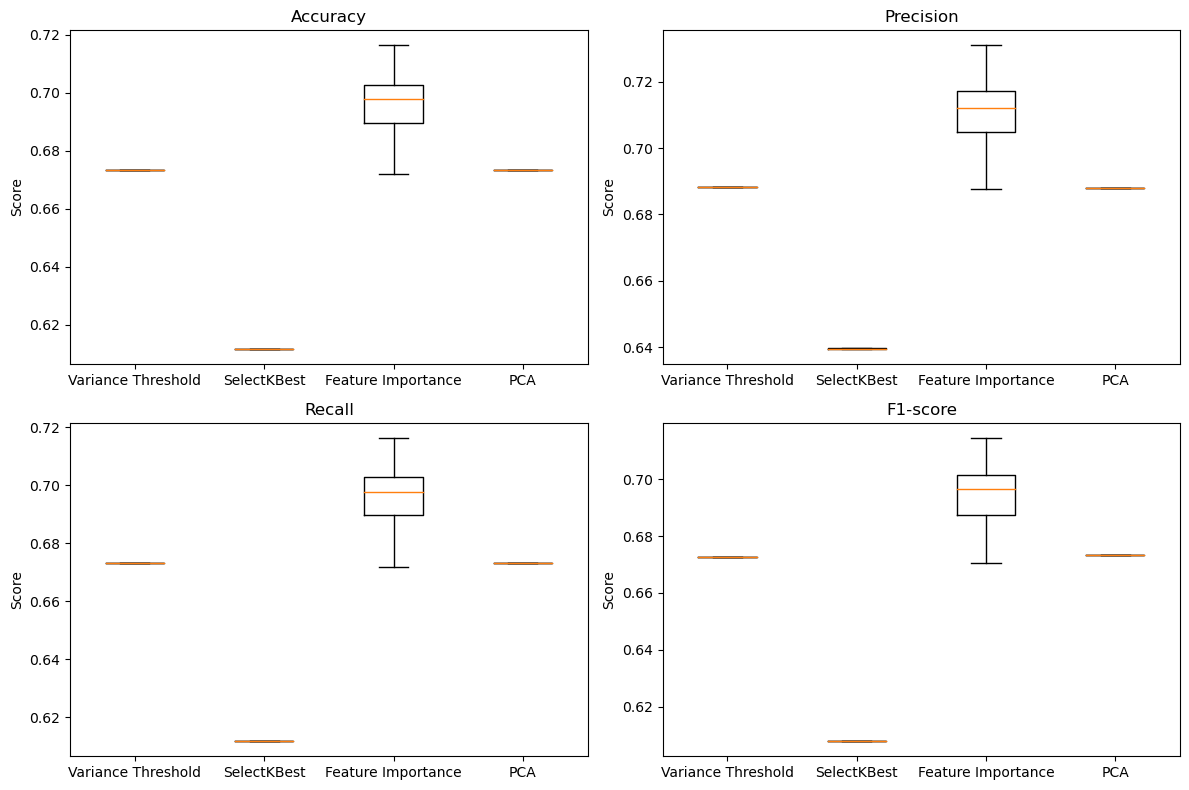

In [15]:
#dimiourgia grafimatwn
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    data = [results[metric][alg_name] for alg_name, _ in algorithms]
    plt.boxplot(data, labels=[alg_name for alg_name, _ in algorithms], showfliers=False)
    plt.title(metric)
    plt.ylabel('Score')

plt.tight_layout()
plt.show()

In [17]:
#afairw -1 gia na tairiazei i eksodos 0,1,2,3
y = y - 1

# Diaxwrismos test kai train twn epilegmenwn xaraktiristikwn apoto proigoumeno vima
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Iesemble classifiers
rf_classifier = RandomForestClassifier()
xgb_classifier = XGBClassifier()
catboost_classifier = CatBoostClassifier()
bagging_classifier = BaggingClassifier()

# kanw fit tous classifiers me ta data
rf_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
catboost_classifier.fit(X_train, y_train)
bagging_classifier.fit(X_train, y_train)

# ginontai provlepseis me vasi ta trained
rf_predictions = rf_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)
catboost_predictions = catboost_classifier.predict(X_test)
bagging_predictions = bagging_classifier.predict(X_test)

# ipologismos apodosis basi texnikwn
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1_score = f1_score(y_test, rf_predictions, average='weighted')

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')
xgb_f1_score = f1_score(y_test, xgb_predictions, average='weighted')

catboost_accuracy = accuracy_score(y_test, catboost_predictions)
catboost_precision = precision_score(y_test, catboost_predictions, average='weighted')
catboost_recall = recall_score(y_test, catboost_predictions, average='weighted')
catboost_f1_score = f1_score(y_test, catboost_predictions, average='weighted')

bagging_accuracy = accuracy_score(y_test, bagging_predictions)
bagging_precision = precision_score(y_test, bagging_predictions, average='weighted')
bagging_recall = recall_score(y_test, bagging_predictions, average='weighted')
bagging_f1_score = f1_score(y_test, bagging_predictions, average='weighted')


Learning rate set to 0.081453
0:	learn: 1.3786882	total: 986ms	remaining: 16m 25s
1:	learn: 1.3668252	total: 1.41s	remaining: 11m 41s
2:	learn: 1.3587045	total: 1.82s	remaining: 10m 5s
3:	learn: 1.3486920	total: 2.25s	remaining: 9m 20s
4:	learn: 1.3415587	total: 2.69s	remaining: 8m 54s
5:	learn: 1.3299156	total: 3.1s	remaining: 8m 33s
6:	learn: 1.3221240	total: 3.54s	remaining: 8m 22s
7:	learn: 1.3121730	total: 3.98s	remaining: 8m 13s
8:	learn: 1.3055083	total: 4.4s	remaining: 8m 4s
9:	learn: 1.2985947	total: 4.8s	remaining: 7m 55s
10:	learn: 1.2892921	total: 5.22s	remaining: 7m 49s
11:	learn: 1.2825876	total: 5.63s	remaining: 7m 43s
12:	learn: 1.2757021	total: 6.07s	remaining: 7m 40s
13:	learn: 1.2688817	total: 6.49s	remaining: 7m 37s
14:	learn: 1.2619339	total: 6.92s	remaining: 7m 34s
15:	learn: 1.2554847	total: 7.33s	remaining: 7m 30s
16:	learn: 1.2463709	total: 7.74s	remaining: 7m 27s
17:	learn: 1.2416270	total: 8.15s	remaining: 7m 24s
18:	learn: 1.2360889	total: 8.57s	remaining: 7

In [18]:
metrics_data = {
    'Classifier': ['Random Forest', 'XGBoost', 'CatBoost', 'Bagging'],
    'Accuracy': [
        accuracy_score(y_test, rf_predictions),
        accuracy_score(y_test, xgb_predictions),
        accuracy_score(y_test, catboost_predictions),
        accuracy_score(y_test, bagging_predictions)
    ],
    'Precision': [
        precision_score(y_test, rf_predictions, average='macro'),
        precision_score(y_test, xgb_predictions, average='macro'),
        precision_score(y_test, catboost_predictions, average='macro'),
        precision_score(y_test, bagging_predictions, average='macro')
    ],
    'Recall': [
        recall_score(y_test, rf_predictions, average='macro'),
        recall_score(y_test, xgb_predictions, average='macro'),
        recall_score(y_test, catboost_predictions, average='macro'),
        recall_score(y_test, bagging_predictions, average='macro')
    ],
    'F1-score': [
        f1_score(y_test, rf_predictions, average='macro'),
        f1_score(y_test, xgb_predictions, average='macro'),
        f1_score(y_test, catboost_predictions, average='macro'),
        f1_score(y_test, bagging_predictions, average='macro')
    ]
}

# vazw ta apotelesmata se pinaka gia na ta kanw display
classifiers = pd.DataFrame(metrics_data)
classifiers

,Classifier,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.461538,0.457074,0.448597,0.435983
1,XGBoost,0.481900,0.475120,0.476943,0.474887
2,CatBoost,0.538462,0.531550,0.529253,0.523401
3,Bagging,0.404977,0.408410,0.400092,0.398567


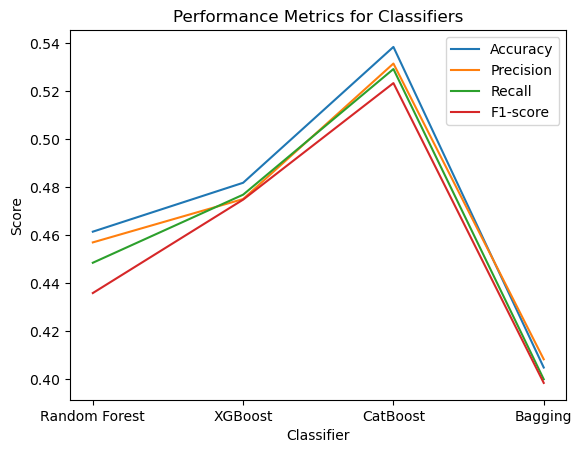

In [19]:
import matplotlib.pyplot as plt

# Define the classifiers and their performance metrics
classifiers = ['Random Forest', 'XGBoost', 'CatBoost', 'Bagging']
accuracy = [accuracy_score(y_test, rf_predictions),
            accuracy_score(y_test, xgb_predictions),
            accuracy_score(y_test, catboost_predictions),
            accuracy_score(y_test, bagging_predictions)]
precision = [precision_score(y_test, rf_predictions, average='macro'),
             precision_score(y_test, xgb_predictions, average='macro'),
             precision_score(y_test, catboost_predictions, average='macro'),
             precision_score(y_test, bagging_predictions, average='macro')]
recall = [recall_score(y_test, rf_predictions, average='macro'),
          recall_score(y_test, xgb_predictions, average='macro'),
          recall_score(y_test, catboost_predictions, average='macro'),
          recall_score(y_test, bagging_predictions, average='macro')]
f1_score = [f1_score(y_test, rf_predictions, average='macro'),
            f1_score(y_test, xgb_predictions, average='macro'),
            f1_score(y_test, catboost_predictions, average='macro'),
            f1_score(y_test, bagging_predictions, average='macro')]

# Create a line plot for each performance metric
plt.plot(classifiers, accuracy, label='Accuracy')
plt.plot(classifiers, precision, label='Precision')
plt.plot(classifiers, recall, label='Recall')
plt.plot(classifiers, f1_score, label='F1-score')

# Add labels and title
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Performance Metrics for Classifiers')

# Add a legend
plt.legend()

# Show the plot
plt.show()
